# Sales Analysis

### Import Necessary Libraries

In [165]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from prettytable import PrettyTable


### Merge the 12 month of sales data into a single CSV file 

In [132]:
files = [file for file in os.listdir('./Sales_Data/')]

all_month_data = pd.DataFrame()

for file in files: 
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data,df])

all_month_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [133]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

##### Drop rows of NaN

In [134]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' and delete it

In [136]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Droping 'Or' rows 

In [137]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convert columns to the correct type

In [138]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

#### Reset the row index to make it continuous again

In [139]:
all_data = all_data.reset_index(drop=True)

### Augment datta with additional columns

#### Add Month Column

In [140]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [141]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a City Column

In [142]:
def getCity(address):
    return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: getCity(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [143]:
print(all_data['City'].unique())
print("Number of Diffrent Cities = ", len(all_data['City'].unique()))


[' Dallas' ' Boston' ' Los Angeles' ' San Francisco' ' Seattle' ' Atlanta'
 ' New York City' ' Portland' ' Austin']
Number of Diffrent Cities =  9


### Add a State Column

In [144]:
def getState(address):
    return address.split(',')[2].split(' ')[1]

all_data['State'] = all_data['Purchase Address'].apply(lambda x: getState(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [145]:
print(all_data['State'].unique())
print("Number of Diffrent States = ", len(all_data['State'].unique()))


['TX' 'MA' 'CA' 'WA' 'GA' 'NY' 'OR' 'ME']
Number of Diffrent States =  8


### Best Month For Sales and How Much

In [146]:
result = all_data.groupby('Month')['Sales'].sum()
print(result)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


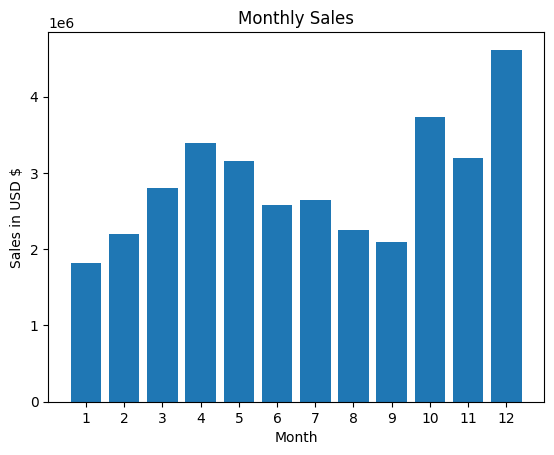

In [147]:
res = all_data.groupby('Month').sum()

months = range(1, 13)

plt.bar(months, res['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales in USD $')
plt.title('Monthly Sales')
plt.xticks(months)  

plt.show()

### The City With Highest Number of Sales

In [148]:
result = all_data.groupby('City')['Sales'].sum().sort_values()
print(result)

City
Austin           1819581.75
Portland         2320490.61
Seattle          2747755.48
Dallas           2767975.40
Atlanta          2795498.58
Boston           3661642.01
New York City    4664317.43
Los Angeles      5452570.80
San Francisco    8262203.91
Name: Sales, dtype: float64


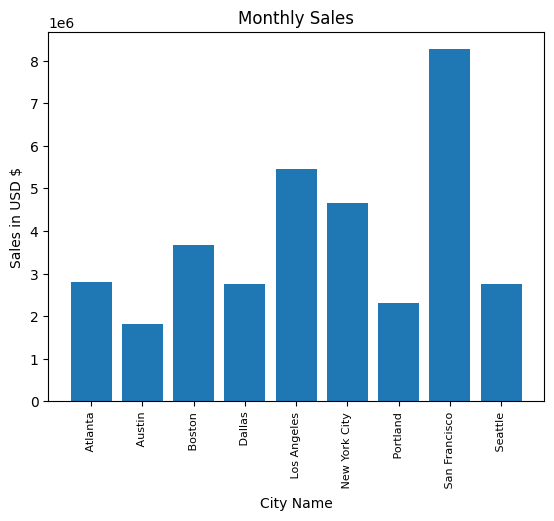

In [149]:
res = all_data.groupby('City').sum()

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, res['Sales'])
plt.xlabel('City Name')
plt.ylabel('Sales in USD $')
plt.title('Monthly Sales')
plt.xticks(cities, rotation = 'vertical', size = 8)  

plt.show()

### What time should we display ads to maximize likelihood of customer's buying products? 

In [150]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\shmoo\AppData\Local\Temp\ipykernel_5636\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [151]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27,1


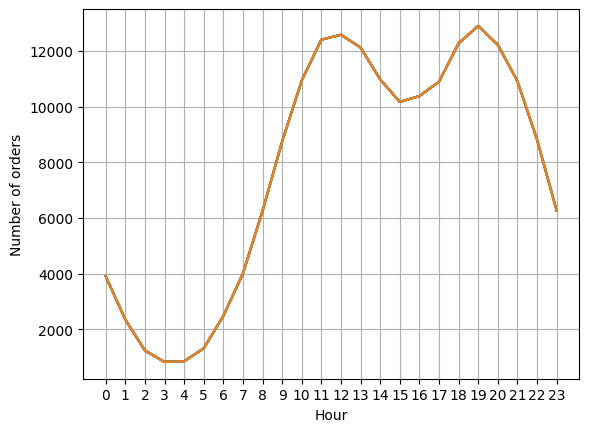

In [152]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

### What products are most often sold together? 

In [161]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', ' .join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [166]:
count = Counter()

table = PrettyTable(["Combination", "Count"])

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    table.add_row([', '.join(key), value])
    
print(table)

+----------------------------------------------+-------+
|                 Combination                  | Count |
+----------------------------------------------+-------+
|      iPhone,  Lightning Charging Cable       |  1005 |
|     Google Phone,  USB-C Charging Cable      |  987  |
|          iPhone,  Wired Headphones           |  447  |
|       Google Phone,  Wired Headphones        |  414  |
|    Vareebadd Phone,  USB-C Charging Cable    |  361  |
|      iPhone,  Apple Airpods Headphones       |  360  |
|  Google Phone,  Bose SoundSport Headphones   |  220  |
|      Vareebadd Phone,  Wired Headphones      |  143  |
|    USB-C Charging Cable,  Wired Headphones   |  120  |
| Vareebadd Phone,  Bose SoundSport Headphones |   80  |
+----------------------------------------------+-------+
